In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import anndata as ad
import scvelo as scv
import scipy as sc
import seaborn as sns

In [2]:
adata = ad.read('../data/processed/mus_musculus_preprocessed_with_params.h5ad')

In [3]:
# test_df = adata.var.head(10)

In [4]:
# adata._inplace_subset_var(test_df.index)

In [5]:
adata

AnnData object with n_obs × n_vars = 682 × 7439
    obs: 'plate', 'leiden', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57', 'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast', 'ratio_sum_allele_c57', 'ratio_sum_allele_cast', 'ratio_mean_allele_c57', 'ratio_mean_allele_cast', 'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value', 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'c57_kon', 'c57_koff', 'c57_ksyn', 'cast_kon', 'cast_koff', 'cast_ksyn', 'total_kon', 'total_koff', 'total_ksyn'
    uns: 'leiden', 'neighbors', 'umap'
    obsm: 'X_umap'
    layers: 'allele_c57', 'allele_cast', 'ambiguous', 'matrix', 'ratio_allele_c57', 'ratio_allele_cast', 'spanning', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

<AxesSubplot:xlabel='c57_kon', ylabel='Density'>

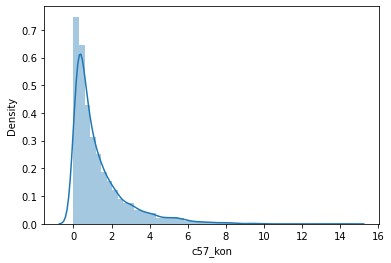

In [6]:
sns.distplot(adata.var.c57_kon)

<AxesSubplot:xlabel='cast_kon', ylabel='Density'>

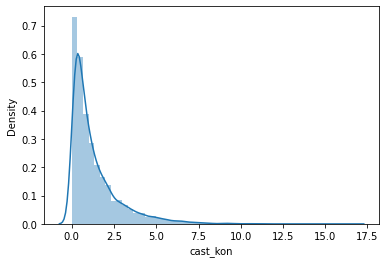

In [7]:
sns.distplot(adata.var.cast_kon)

<AxesSubplot:xlabel='total_kon', ylabel='Density'>

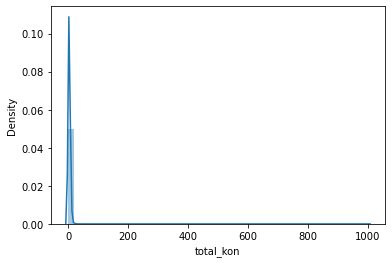

In [8]:
sns.distplot(adata.var.total_kon)

<AxesSubplot:xlabel='ratio_std_allele_c57', ylabel='c57_kon'>

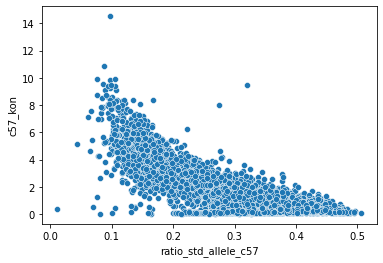

In [9]:
sns.scatterplot(data=adata.var, x="ratio_std_allele_c57", y="c57_kon")

<AxesSubplot:xlabel='ratio_std_allele_cast', ylabel='cast_kon'>

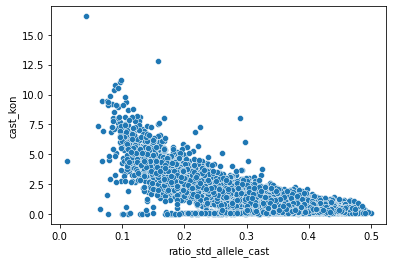

In [10]:
sns.scatterplot(data=adata.var, x="ratio_std_allele_cast", y="cast_kon")

In [11]:
# sns.scatterplot(data=adata.var, x="ratio_std", y="total_kon")

In [22]:
adata.var.columns

Index(['Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57',
       'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast',
       'ratio_sum_allele_c57', 'ratio_sum_allele_cast',
       'ratio_mean_allele_c57', 'ratio_mean_allele_cast',
       'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value',
       'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot',
       'c57_kon', 'c57_koff', 'c57_ksyn', 'cast_kon', 'cast_koff', 'cast_ksyn',
       'total_kon', 'total_koff', 'total_ksyn', 'c57_kon_ratio',
       'cast_kon_ratio'],
      dtype='object')

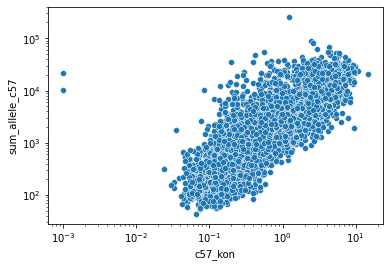

In [26]:
sns.scatterplot(data=adata.var, x="c57_kon", y="sum_allele_c57")
plt.yscale("log")
plt.xscale("log")

<AxesSubplot:xlabel='c57_kon', ylabel='sum_allele_c57'>

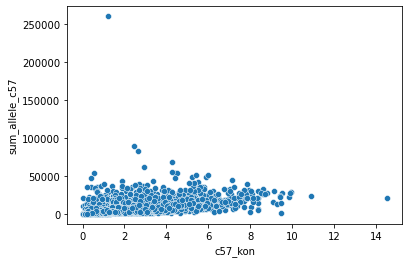

In [27]:
sns.scatterplot(data=adata.var, x="c57_kon", y="sum_allele_c57")

<AxesSubplot:xlabel='c57_koff', ylabel='sum_allele_c57'>

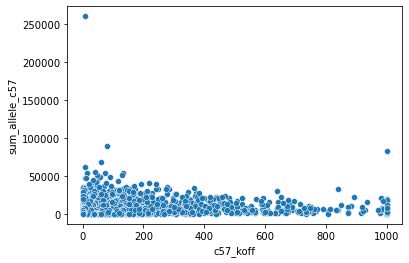

In [28]:
sns.scatterplot(data=adata.var, x="c57_koff", y="sum_allele_c57")

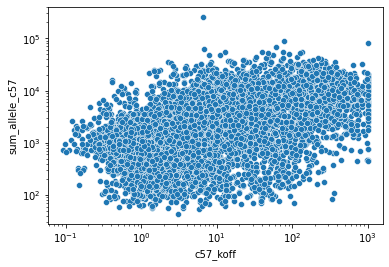

In [29]:
sns.scatterplot(data=adata.var, x="c57_koff", y="sum_allele_c57")
plt.yscale("log")
plt.xscale("log")

<AxesSubplot:xlabel='c57_koff', ylabel='sum_ratio_allele_c57'>

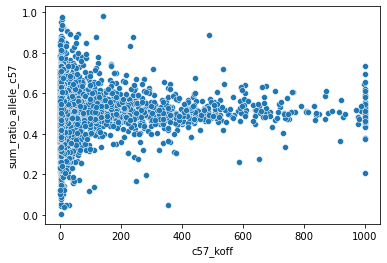

In [31]:
sns.scatterplot(data=adata.var, x="c57_koff", y="sum_ratio_allele_c57")


<AxesSubplot:xlabel='c57_ksyn', ylabel='sum_allele_c57'>

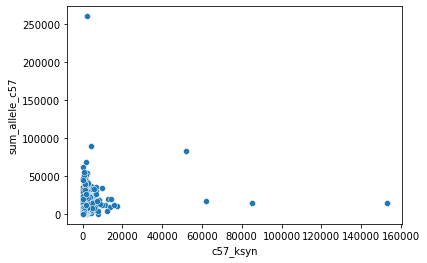

In [33]:
sns.scatterplot(data=adata.var, x="c57_ksyn", y="sum_allele_c57")

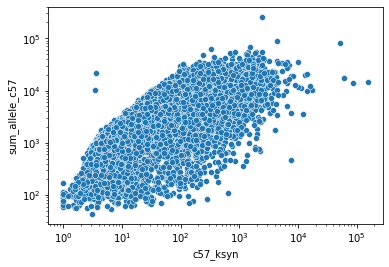

In [34]:
sns.scatterplot(data=adata.var, x="c57_ksyn", y="sum_allele_c57")
plt.yscale("log")
plt.xscale("log")

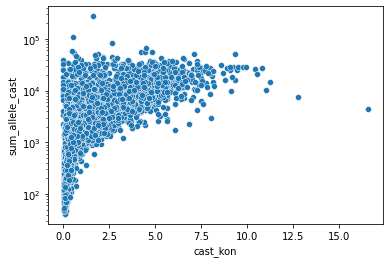

In [25]:
sns.scatterplot(data=adata.var, x="cast_kon", y="sum_allele_cast")
plt.yscale("log")

<AxesSubplot:xlabel='c57_kon', ylabel='sum_allele_c57'>

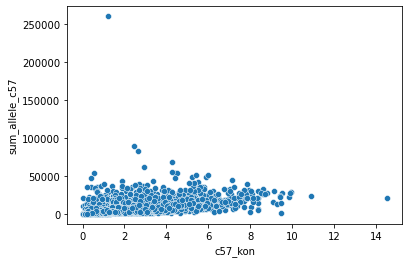

In [14]:
sns.scatterplot(data=adata.var, x="c57_kon", y="sum_allele_c57")

<AxesSubplot:xlabel='cast_kon', ylabel='sum_allele_cast'>

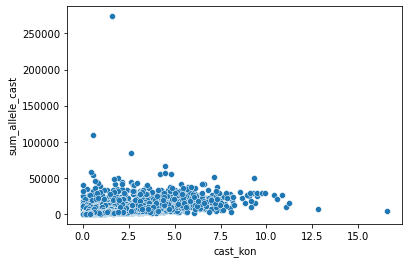

In [15]:
sns.scatterplot(data=adata.var, x="cast_kon", y="sum_allele_cast")

In [16]:
adata.var['c57_kon_ratio'] = adata.var['c57_kon'] / adata.var['total_kon']
adata.var['cast_kon_ratio'] = adata.var['cast_kon'] / adata.var['total_kon']

In [17]:
adata.var

,Accession,Chromosome,End,Start,Strand,sum_allele_c57,sum_allele_cast,sum_ratio_allele_c57,sum_ratio_allele_cast,ratio_sum_allele_c57,...,c57_koff,c57_ksyn,cast_kon,cast_koff,cast_ksyn,total_kon,total_koff,total_ksyn,c57_kon_ratio,cast_kon_ratio
Gene,,,,,,,,,,,,,,,,,,,,,
Mrpl15,ENSMUSG00000033845,1,4785739,4773206,-,1175.0,1092.0,0.518306,0.481694,153.475673,...,1.025298,16.142093,0.122347,1.224672,19.529545,0.175476,1.132123,27.833175,0.783813,0.697228
4732440D04Rik,ENSMUSG00000090031,1,6214590,6213293,-,1498.0,1261.0,0.542950,0.457050,308.882750,...,12.361265,37.523179,0.699138,58.325099,158.448099,1.358319,403.981764,1222.432088,0.573516,0.514708
Cops5,ENSMUSG00000025917,1,10038127,10024602,-,8192.0,7966.0,0.506993,0.493007,323.482196,...,2.727551,56.500928,1.147452,72.681626,795.075994,2.557655,836.126843,8235.446613,0.306753,0.448634
Arfgef1,ENSMUSG00000067851,1,10232670,10137571,-,1841.0,1842.0,0.499864,0.500136,284.025982,...,4.123210,24.559485,0.575572,3.908667,23.000236,1.560758,255.002303,972.697642,0.360444,0.368777
Tram1,ENSMUSG00000025935,1,13589864,13564702,-,7514.0,7028.0,0.516710,0.483290,350.605317,...,448.080240,1451.860539,3.621442,472.175264,1350.464250,4.037842,694.491005,3705.471848,0.850319,0.896876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Exosc7,ENSMUSG00000025785,9,123136129,123113215,+,3556.0,3447.0,0.507782,0.492218,317.695221,...,113.483108,957.701819,0.615424,86.296659,732.917759,1.348519,221.798252,1742.364248,0.473666,0.456370
Lars2,ENSMUSG00000035202,9,123462664,123366940,+,376.0,763.0,0.330114,0.669886,114.946627,...,0.385575,3.631488,0.447942,1.585246,7.474467,0.978933,2.665669,9.151741,0.113208,0.457581
Sacm1l,ENSMUSG00000025240,9,123592598,123529882,+,1444.0,1262.0,0.533629,0.466371,267.715853,...,118.690680,593.689143,0.405336,147.228885,680.114701,0.573285,123.600184,917.878001,0.753008,0.707042


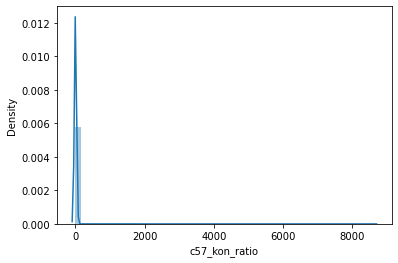

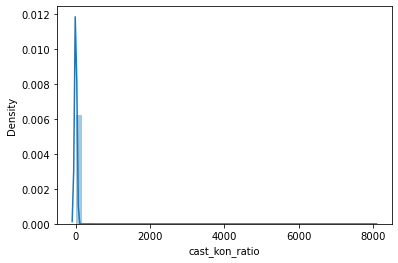

In [18]:
sns.distplot(adata.var.c57_kon_ratio)
plt.show()
sns.distplot(adata.var.cast_kon_ratio)
plt.show()

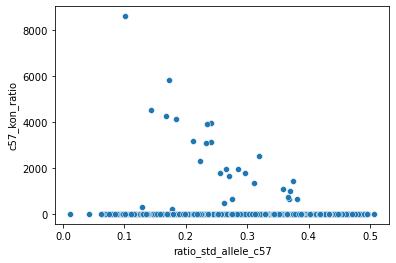

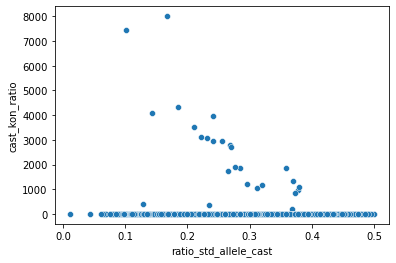

In [19]:
sns.scatterplot(data=adata.var, x="ratio_std_allele_c57", y="c57_kon_ratio")
plt.show()
sns.scatterplot(data=adata.var, x="ratio_std_allele_cast", y="cast_kon_ratio")
plt.show()

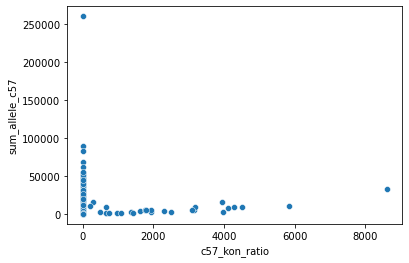

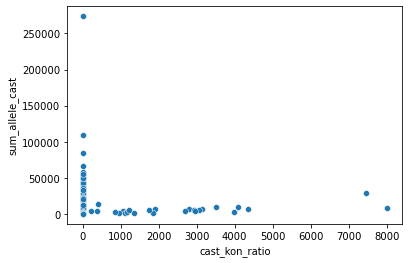

In [20]:
sns.scatterplot(data=adata.var, x="c57_kon_ratio", y="sum_allele_c57")
plt.show()
sns.scatterplot(data=adata.var, x="cast_kon_ratio", y="sum_allele_cast")
plt.show()

In [21]:
adata

AnnData object with n_obs × n_vars = 682 × 7439
    obs: 'plate', 'leiden', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57', 'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast', 'ratio_sum_allele_c57', 'ratio_sum_allele_cast', 'ratio_mean_allele_c57', 'ratio_mean_allele_cast', 'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value', 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'c57_kon', 'c57_koff', 'c57_ksyn', 'cast_kon', 'cast_koff', 'cast_ksyn', 'total_kon', 'total_koff', 'total_ksyn', 'c57_kon_ratio', 'cast_kon_ratio'
    uns: 'leiden', 'neighbors', 'umap'
    obsm: 'X_umap'
    layers: 'allele_c57', 'allele_cast', 'ambiguous', 'matrix', 'ratio_allele_c57', 'ratio_allele_cast', 'spanning', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'